In [7]:
train_root = "Alzheimer_s Dataset/train"
test_root = "Alzheimer_s Dataset/test"

In [8]:
batch_size = 10

In [9]:
from keras.preprocessing.image import ImageDataGenerator

Generator = ImageDataGenerator()
train_data = Generator.flow_from_directory(train_root, (150, 150), batch_size=batch_size)
test_data = Generator.flow_from_directory(test_root, (150, 150), batch_size=batch_size)

Found 5121 images belonging to 4 classes.
Found 1279 images belonging to 4 classes.


4


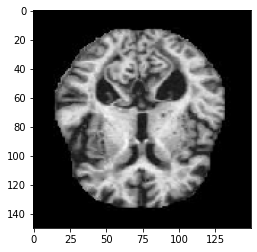

In [10]:
import tensorflow as tf
from matplotlib.pyplot import imshow
import os

im = train_data[0][0][1]
img = tf.keras.preprocessing.image.array_to_img(im)
imshow(img)

num_classes = len([i for i in os.listdir(train_root)])
print(num_classes)

In [11]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D

model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=(150, 150, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2))
model.add(Dropout(0.05))

model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2))
model.add(Dropout(0.05))

model.add(Conv2D(64, (3, 3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2))
model.add(Dropout(0.2))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2))
model.add(Dropout(0.2))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(num_classes, activation="softmax"))
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 dropout_6 (Dropout)         (None, 74, 74, 32)        0         
                                                                 
 conv2d_5 (Conv2D)           (None, 72, 72, 32)        9248      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 dropout_7 (Dropout)         (None, 36, 36, 32)       

In [12]:
model.compile(loss=keras.losses.categorical_crossentropy, optimizer=tf.keras.optimizers.Adam(), metrics=['accuracy'])
model.fit(train_data, batch_size = batch_size, epochs=10)

Epoch 1/10
513/513 [==============================] - 73s 141ms/step - loss: 1.8957 - accuracy: 0.4690
Epoch 2/10
513/513 [==============================] - 73s 143ms/step - loss: 1.0118 - accuracy: 0.5235
Epoch 3/10
513/513 [==============================] - 77s 148ms/step - loss: 0.9674 - accuracy: 0.5376
Epoch 4/10
130/513 [======>.......................] - ETA: 54s - loss: 0.9636 - accuracy: 0.5500

KeyboardInterrupt: 

In [ ]:
score = model.evaluate(train_data)
print(score)
score = model.evaluate(test_data)
print(score)